In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bhainsdehi in
new norfolk au
asyut eg
ruidoso us
pierre us
chokurdakh ru
praia da vitoria pt
barentsburg sj
arinos br
rikitea pf
hermanus za
svarstad no
williams lake ca
hambantota lk
avarua ck
avarua ck
saint-augustin ca
tasiilaq gl
arraial do cabo br
khatanga ru
port elizabeth za
mar del plata ar
las vegas us
samusu ws
henties bay na
rikitea pf
rikitea pf
samalaeulu ws
milingimbi au
bredasdorp za
new norfolk au
straumen no
taolanaro mg
rio gallegos ar
aklavik ca
luderitz na
upernavik gl
bambous virieux mu
chuy uy
sawakin sd
khatanga ru
vaitupu wf
durazno uy
jacareacanga br
ancud cl
ancud cl
new norfolk au
sar-e pul af
rikitea pf
ranong th
torbay ca
rikitea pf
belushya guba ru
mataura pf
vaitupu wf
kapaa us
khatanga ru
albany au
taolanaro mg
port-gentil ga
punta arenas cl
dingle ie
saint-philippe re
albany au
kon tum vn
shelburne ca
puerto ayora ec
bluff nz
taolanaro mg
grand river south east mu
chokurdakh ru
brae gb
bengkulu id
barentsburg sj
yellowknife ca
hermanus za
touros br
mar 

ulaangom mn
neiafu to
atuona pf
port hardy ca
hermanus za
san cristobal ec
borama so
punta arenas cl
parrita cr
olga ru
guerrero negro mx
barrow us
barrow us
ushuaia ar
cape town za
namatanai pg
south houston us
busselton au
punta arenas cl
san cristobal ec
punta arenas cl
broome au
grand river south east mu
port hedland au
lavrentiya ru
chifeng cn
ahipara nz
sorvag fo
port alfred za
east london za
bluff nz
punta arenas cl
rikitea pf
bolshiye uki ru
avarua ck
cape town za
camacha pt
akyab mm
atbasar kz
ridgecrest us
anda cn
qaanaaq gl
cabo san lucas mx
busselton au
doka sd
albany au
nagaur in
tabiauea ki
manokwari id
lively ca
illoqqortoormiut gl
leshukonskoye ru
jamestown sh
busselton au
yulara au
amahai id
tikhvin ru
sechura pe
port elizabeth za
eureka us
mataura pf
tymovskoye ru
zheleznodorozhnyy ru
kapaa us
butaritari ki
ribeira grande pt
tuktoyaktuk ca
castro cl
husavik is
chokurdakh ru
cabedelo br
busselton au
rikitea pf
mataura pf
busselton au
veraval in
mar del plata ar
chokurd

severo-kurilsk ru
molchanovo ru
punta arenas cl
diego de almagro cl
jamestown sh
sao raimundo das mangabeiras br
carnarvon au
atuona pf
saint-philippe re
jamestown sh
puerto ayora ec
mataura pf
mataura pf
kavieng pg
belushya guba ru
klaksvik fo
illoqqortoormiut gl
rikitea pf
scarborough tt
lagoa pt
tura ru
sao filipe cv
saint-philippe re
ushuaia ar
qaqortoq gl
carnarvon au
busselton au
georgetown sh
norman wells ca
hobart au
polkowice pl
rikitea pf
jiazi cn
lompoc us
severo-kurilsk ru
eureka us
sompeta in
avarua ck
hobart au
dingle ie
rikitea pf
barentsburg sj
praia da vitoria pt
taolanaro mg
chagda ru
tasiilaq gl
inuvik ca
norman wells ca
nyurba ru
rikitea pf
avarua ck
busselton au
bluff nz
amderma ru
shingu jp
yomitan jp
ban nahin la
ushuaia ar
hermanus za
punta arenas cl
inta ru
rikitea pf
taolanaro mg
rikitea pf
carnarvon au
gorontalo id
hithadhoo mv
puerto ayora ec
upernavik gl
port-de-bouc fr
ngunguru nz
karaul ru
shirokiy ru
vaini to
vaini to
mataura pf
saint-francois gp
barents

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7ebf29130843a0418ab5f77ebdcde86


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7ebf29130843a0418ab5f77ebdcde86&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bhainsdehi
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | asyut
Processing Record 4 of Set 13 | ruidoso
Processing Record 5 of Set 13 | pierre
Processing Record 6 of Set 13 | chokurdakh
Processing Record 7 of Set 13 | praia da vitoria
Processing Record 8 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 13 | arinos
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | hermanus
Processing Record 12 of Set 13 | svarstad
Processing Record 13 of Set 13 | williams lake
Processing Record 14 of Set 13 | hambantota
Processing Record 15 of Set 13 | avarua
Processing Record 16 of Set 13 | saint-augustin
Processing Record 17 of Set 13 | tasiilaq
Processing Record 18 of Set 13 | arraial do cabo
Processing Record 19 of Set 13 | khatanga
Processing Record 20 of Set 13 | port elizabeth
Processing Record 21 of Set 13 | mar del plata
P

Processing Record 33 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 16 | lebu
Processing Record 35 of Set 16 | tautira
Processing Record 36 of Set 16 | poum
Processing Record 37 of Set 16 | hohhot
Processing Record 38 of Set 16 | sidi bu zayd
City not found. Skipping...
Processing Record 39 of Set 16 | viransehir
Processing Record 40 of Set 16 | novobiryusinskiy
Processing Record 41 of Set 16 | humberto de campos
Processing Record 42 of Set 16 | vao
Processing Record 43 of Set 16 | hilo
Processing Record 44 of Set 16 | schaffhausen
Processing Record 45 of Set 16 | itoman
Processing Record 46 of Set 16 | nago
Processing Record 47 of Set 16 | dikson
Processing Record 48 of Set 16 | salalah
Processing Record 49 of Set 16 | payo
Processing Record 50 of Set 16 | marawi
Processing Record 1 of Set 17 | maldonado
Processing Record 2 of Set 17 | necochea
Processing Record 3 of Set 17 | kaeo
Processing Record 4 of Set 17 | linxia
Processing Record 5 of Set 17 | p

Processing Record 19 of Set 20 | olga
Processing Record 20 of Set 20 | namatanai
Processing Record 21 of Set 20 | south houston
Processing Record 22 of Set 20 | broome
Processing Record 23 of Set 20 | port hedland
Processing Record 24 of Set 20 | chifeng
Processing Record 25 of Set 20 | ahipara
Processing Record 26 of Set 20 | bolshiye uki
City not found. Skipping...
Processing Record 27 of Set 20 | camacha
Processing Record 28 of Set 20 | akyab
Processing Record 29 of Set 20 | anda
Processing Record 30 of Set 20 | doka
Processing Record 31 of Set 20 | nagaur
Processing Record 32 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 20 | manokwari
Processing Record 34 of Set 20 | lively
Processing Record 35 of Set 20 | leshukonskoye
Processing Record 36 of Set 20 | yulara
Processing Record 37 of Set 20 | amahai
Processing Record 38 of Set 20 | tikhvin
Processing Record 39 of Set 20 | sechura
Processing Record 40 of Set 20 | eureka
Processing Record 41 of Set 20 |

Processing Record 8 of Set 24 | moron
Processing Record 9 of Set 24 | hargeysa
Processing Record 10 of Set 24 | aripuana
Processing Record 11 of Set 24 | mutsamudu
City not found. Skipping...
Processing Record 12 of Set 24 | longlac
City not found. Skipping...
Processing Record 13 of Set 24 | manzhouli
Processing Record 14 of Set 24 | abu samrah
Processing Record 15 of Set 24 | altagracia de orituco
Processing Record 16 of Set 24 | vila velha
Processing Record 17 of Set 24 | uruacu
Processing Record 18 of Set 24 | yerbogachen
Processing Record 19 of Set 24 | mercedes
Processing Record 20 of Set 24 | ituni
City not found. Skipping...
Processing Record 21 of Set 24 | tabas
Processing Record 22 of Set 24 | nichinan
Processing Record 23 of Set 24 | jiuquan
Processing Record 24 of Set 24 | lorengau
Processing Record 25 of Set 24 | kuloy
Processing Record 26 of Set 24 | minudasht
City not found. Skipping...
Processing Record 27 of Set 24 | plymouth
Processing Record 28 of Set 24 | malatya
Pr

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bhainsdehi,21.6467,77.6325,88.03,15,1,3.33,IN,2022-04-26 16:56:47
1,New Norfolk,-42.7826,147.0587,49.91,83,100,1.95,AU,2022-04-26 16:56:47
2,Asyut,27.1810,31.1837,95.18,11,3,13.53,EG,2022-04-26 16:56:48
3,Ruidoso,33.3317,-105.6730,62.62,28,0,16.11,US,2022-04-26 16:56:48
4,Pierre,44.3683,-100.3510,48.27,48,5,7.00,US,2022-04-26 16:56:48
5,Chokurdakh,70.6333,147.9167,-1.64,100,100,5.39,RU,2022-04-26 16:56:49
6,Praia Da Vitoria,38.7333,-27.0667,66.45,72,40,18.28,PT,2022-04-26 16:56:49
7,Arinos,-15.9169,-46.1056,92.05,29,6,6.58,BR,2022-04-26 16:56:50
8,Rikitea,-23.1203,-134.9692,78.31,73,98,20.24,PF,2022-04-26 16:56:50
9,Hermanus,-34.4187,19.2345,59.81,73,0,9.44,ZA,2022-04-26 16:54:14


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bhainsdehi,IN,2022-04-26 16:56:47,21.6467,77.6325,88.03,15,1,3.33
1,New Norfolk,AU,2022-04-26 16:56:47,-42.7826,147.0587,49.91,83,100,1.95
2,Asyut,EG,2022-04-26 16:56:48,27.1810,31.1837,95.18,11,3,13.53
3,Ruidoso,US,2022-04-26 16:56:48,33.3317,-105.6730,62.62,28,0,16.11
4,Pierre,US,2022-04-26 16:56:48,44.3683,-100.3510,48.27,48,5,7.00
...,...,...,...,...,...,...,...,...,...
569,Mauriti,BR,2022-04-26 17:12:52,-7.3892,-38.7744,90.73,37,26,11.50
570,Sabha,LY,2022-04-26 17:12:52,27.0377,14.4283,94.48,5,100,8.88
571,Arriana,GR,2022-04-26 17:12:53,41.0833,25.7000,69.15,83,2,1.30
572,Nchelenge,ZM,2022-04-26 17:12:53,-9.3451,28.7340,71.62,82,100,6.85


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

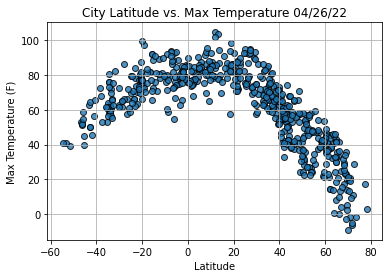

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

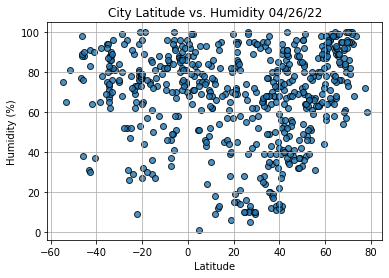

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

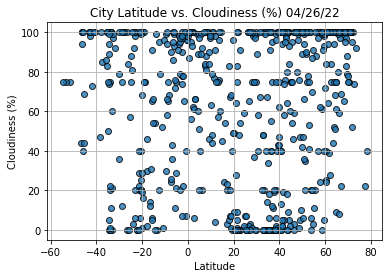

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

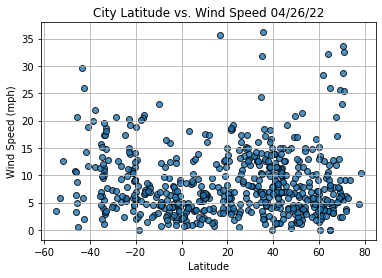

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2022-04-26 16:56:51
Lat                      -21.2078
Lng                      -159.775
Max Temp                    77.05
Humidity                       94
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
569    False
570     True
571     True
572    False
573     True
Name: Lat, Length: 574, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bhainsdehi,IN,2022-04-26 16:56:47,21.6467,77.6325,88.03,15,1,3.33
2,Asyut,EG,2022-04-26 16:56:48,27.1810,31.1837,95.18,11,3,13.53
3,Ruidoso,US,2022-04-26 16:56:48,33.3317,-105.6730,62.62,28,0,16.11
4,Pierre,US,2022-04-26 16:56:48,44.3683,-100.3510,48.27,48,5,7.00
5,Chokurdakh,RU,2022-04-26 16:56:49,70.6333,147.9167,-1.64,100,100,5.39
...,...,...,...,...,...,...,...,...,...
567,Shirokiy,RU,2022-04-26 17:12:50,49.7580,129.5230,33.26,85,100,20.87
568,Ciechocinek,PL,2022-04-26 17:12:50,52.8791,18.7951,57.20,39,53,3.74
570,Sabha,LY,2022-04-26 17:12:52,27.0377,14.4283,94.48,5,100,8.88
571,Arriana,GR,2022-04-26 17:12:53,41.0833,25.7000,69.15,83,2,1.30


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bhainsdehi,IN,2022-04-26 16:56:47,21.6467,77.6325,88.03,15,1,3.33
2,Asyut,EG,2022-04-26 16:56:48,27.1810,31.1837,95.18,11,3,13.53
3,Ruidoso,US,2022-04-26 16:56:48,33.3317,-105.6730,62.62,28,0,16.11
4,Pierre,US,2022-04-26 16:56:48,44.3683,-100.3510,48.27,48,5,7.00
5,Chokurdakh,RU,2022-04-26 16:56:49,70.6333,147.9167,-1.64,100,100,5.39


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

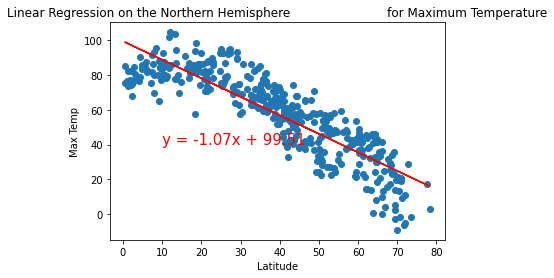

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

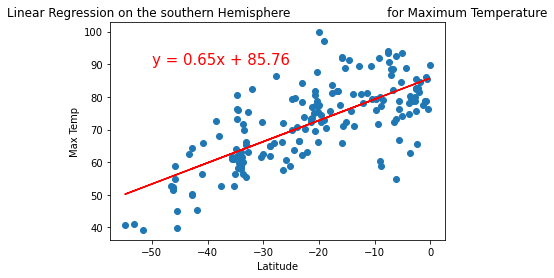

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

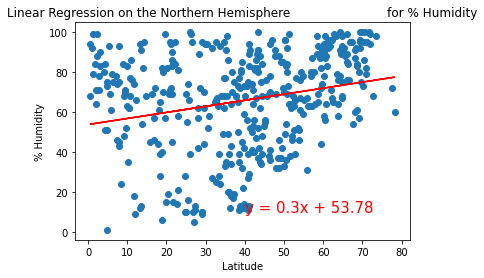

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

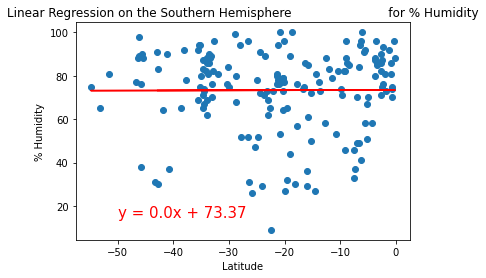

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

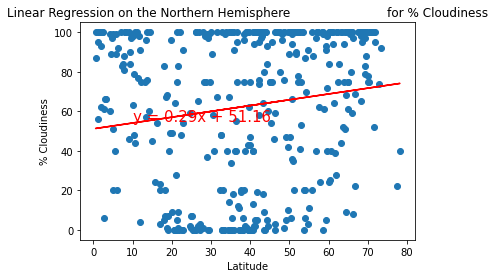

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

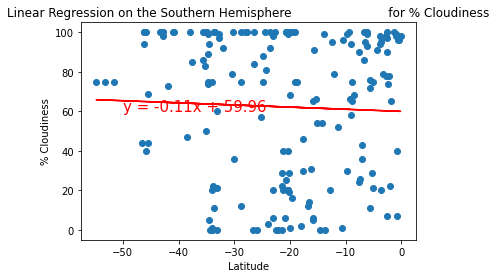

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

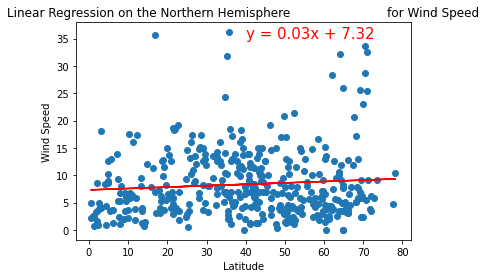

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

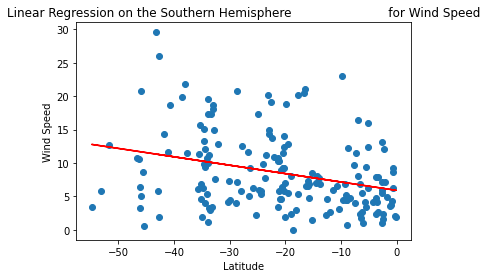

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))